# COVID DASHBOARD: PUNJAB (DATA TILL 03.07.2020)

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import metrics
%matplotlib inline
plt.style.use('seaborn')

CovidDF = pd.read_csv("States_covid_19_india.csv").drop(columns = 'Sno')
PoplDF = pd.read_csv("population_india_census2011.csv").sort_values(by=['State / Union Territory'])
PoplDF.set_index("State / Union Territory", inplace = True)
CovidData = CovidDF.groupby('State/UnionTerritory').sum()
PoplData = pd.DataFrame(PoplDF['Population'])
FinalData = pd.concat([CovidData, PoplData], axis=1, sort=True).dropna().rename_axis("State")
FinalData['IFR'] = FinalData.apply(lambda row: (row.Deaths*100)/row.Confirmed, axis = 1)
FinalData['CMR'] = FinalData.apply(lambda row: (row.Deaths*100)/row.Population, axis = 1)

FinalSELECT = FinalData.loc[['Punjab']]

print(FinalSELECT.head())


           Cured  Deaths  Confirmed  Population       IFR       CMR
State                                                              
Punjab  117984.0  4186.0   181119.0  27743338.0  2.311188  0.015088


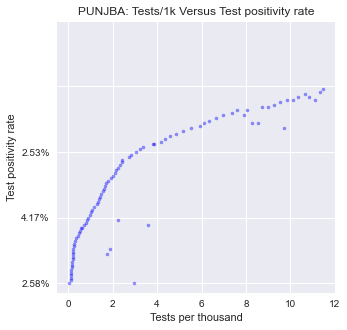

      Updated On   State Test positivity rate  Tests per thousand
2138  02/04/2020  Punjab                2.58%                0.05
2139  08/04/2020  Punjab                3.61%                0.10
2140  09/04/2020  Punjab                4.07%                0.11
2141  10/04/2020  Punjab                4.36%                0.12
2142  11/04/2020  Punjab                4.04%                0.13
      Updated On   State Test positivity rate  Tests per thousand
2224  02/07/2020  Punjab                1.82%               10.64
2225  03/07/2020  Punjab                1.83%               10.85
2226  04/07/2020  Punjab                1.84%               11.11
2227  05/07/2020  Punjab                1.86%               11.31
2228  06/07/2020  Punjab                1.90%               11.47


In [289]:
CovidTEST = pd.read_csv("statewise_tested_numbers_data.csv")
CovidTestFILT = CovidTEST[['Updated On','State','Test positivity rate','Tests per thousand']].dropna()
CovidTestPB = CovidTestFILT[CovidTestFILT['State']=='Punjab']

plt.figure(figsize=(5,5))
plt.scatter(CovidTestPB['Tests per thousand'], CovidTestPB['Test positivity rate'], s=10, c="b", alpha=0.4)
plt.yticks([0,25,50,75,100])
plt.title("PUNJBA: Tests/1k Versus Test positivity rate")
plt.xlabel("Tests per thousand")
plt.ylabel("Test positivity rate")
plt.show()

print(CovidTestPB.head())
print(CovidTestPB.tail())

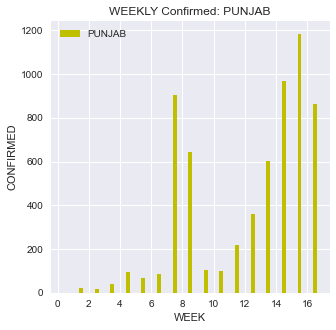

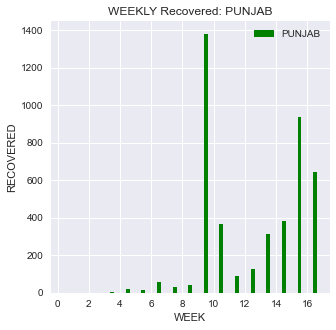

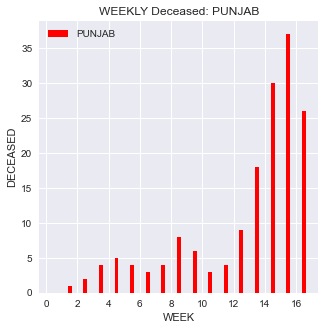

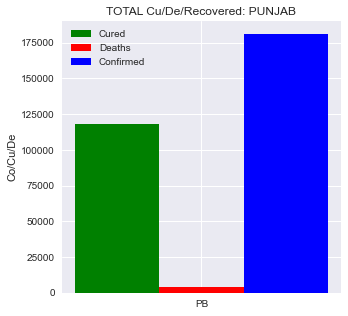

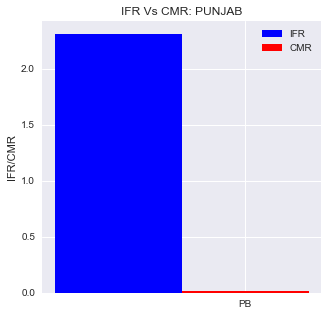

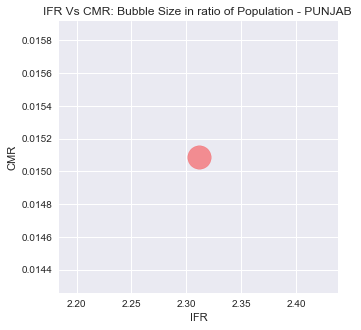

In [290]:
CovidALL = pd.read_csv("state_wise_daily.csv")
CovidPB = CovidALL[['Date','Status','PB']]

CovidPBConf = CovidPB[CovidPB['Status']=='Confirmed']
CovidPBReco = CovidPB[CovidPB['Status']=='Recovered']
CovidPBDece = CovidPB[CovidPB['Status']=='Deceased']

WEEK = [0]*len(CovidPBConf)
for x in range(0,len(CovidPBConf)):
    WEEK[x] = np.floor(abs(x-len(CovidPBConf))/7)

CovidPBConf.insert(0, "WEEK", WEEK, True) 
CovidPBReco.insert(0, "WEEK", WEEK, True) 
CovidPBDece.insert(0, "WEEK", WEEK, True) 

CovidPBConfWEEK = CovidPBConf.groupby('WEEK').sum().sort_index(axis = 0,ascending=False) 
CovidPBRecoWEEK = CovidPBReco.groupby('WEEK').sum().sort_index(axis = 0,ascending=False)  
CovidPBDeceWEEK = CovidPBDece.groupby('WEEK').sum().sort_index(axis = 0,ascending=False) 

barWidth = 0.25
r1 = np.arange(len(CovidPBConfWEEK))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

plt.figure(figsize=(5,5))
plt.bar(r3,CovidPBConfWEEK['PB'], color = 'y', width = 0.25, label = 'PUNJAB')
plt.title("WEEKLY Confirmed: PUNJAB")
plt.xlabel("WEEK")
plt.ylabel("CONFIRMED")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.bar(r3,CovidPBRecoWEEK['PB'], color = 'g', width = 0.25, label = 'PUNJAB')
plt.title("WEEKLY Recovered: PUNJAB")
plt.xlabel("WEEK")
plt.ylabel("RECOVERED")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.bar(r3,CovidPBDeceWEEK['PB'], color = 'r', width = 0.25, label = 'PUNJAB')
plt.title("WEEKLY Deceased: PUNJAB")
plt.xlabel("WEEK")
plt.ylabel("DECEASED")
plt.legend()
plt.show()

r11 = np.arange(len(FinalSELECT))
r22 = [x + barWidth for x in r11]
r33 = [x + barWidth for x in r22]

plt.figure(figsize=(5,5))
plt.bar(r11,FinalSELECT['Cured'], color = 'g', width = 0.25)
plt.bar(r22,FinalSELECT['Deaths'], color = 'r', width = 0.25)
plt.bar(r33,FinalSELECT['Confirmed'], color = 'b', width = 0.25)

plt.xticks([r + barWidth for r in range(len(FinalSELECT))], ['PB'])
plt.title("TOTAL Cu/De/Recovered: PUNJAB")
plt.ylabel("Co/Cu/De")
plt.legend(FinalSELECT)
plt.show()

plt.figure(figsize=(5,5))
plt.bar(r11,FinalSELECT['IFR'], color = 'b', width = 0.25, label = 'IFR')
plt.bar(r22,FinalSELECT['CMR'], color = 'r', width = 0.25, label = 'CMR')

plt.xticks([r + barWidth for r in range(len(FinalSELECT))], ['PB'])
plt.title("IFR Vs CMR: PUNJAB")
plt.ylabel("IFR/CMR")
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
plt.scatter(FinalSELECT['IFR'], FinalSELECT['CMR'], s=FinalSELECT['Population']/50000, c="red", alpha=0.4)
plt.title("IFR Vs CMR: Bubble Size in ratio of Population - PUNJAB ")
plt.xlabel("IFR")
plt.ylabel("CMR")

plt.show()


# QUICK AND SIMPLE PREDICTOR: As the number of Days increase from the infection increases through contageon. Thus we use this high correlation to build a simple confirmed and cured cases predictor for a future date. We drop inital days data as determined from Advanced ARIMA models (in other notebook of Major Project)

In [291]:
CovidDF.head()

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [292]:
PredPB = CovidDF[CovidDF['State/UnionTerritory']=='Punjab'][['Date','Cured','Confirmed']]
PredPB.set_index('Date', inplace = True)
PredPB.head()

,Cured,Confirmed
Date,,
09/03/20,0,1
10/03/20,0,1
11/03/20,0,1
12/03/20,0,1
13/03/20,0,1


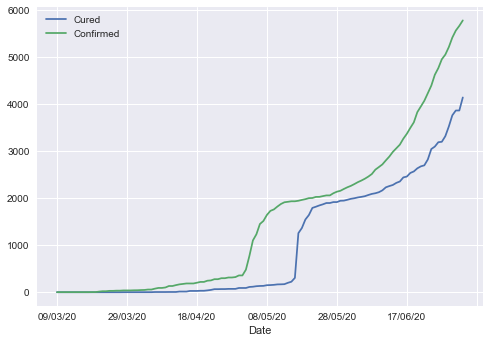

In [293]:
PredPB.plot()
plt.show()

In [294]:
PredXPB = PredPB[80:]
PredXPB.head()

,Cured,Confirmed
Date,,
28/05/20,1918,2139
29/05/20,1946,2158
30/05/20,1949,2197
31/05/20,1967,2233
01/06/20,1987,2263


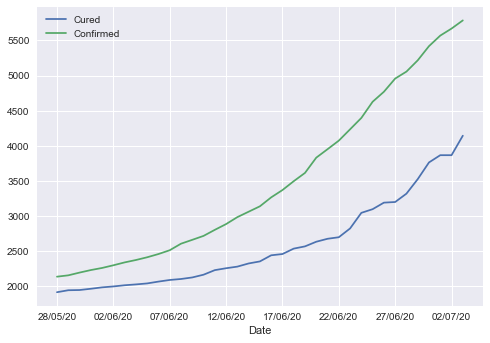

In [295]:
PredXPB.plot()
plt.show()

# It can be observed from the curves above (curvature with no point where tangent  = 0, that they can be best regressed with polynomial of degree 2

In [296]:
XX  = l = [i for i in range(1,len(PredXPB)+1)]
p1 = np.polyfit(XX,PredXPB['Confirmed'],2)
p2 = np.polyfit(XX,PredXPB['Cured'],2)
print(p1)
print(p2)

print('\nPredicttion Eqn of Confirmed Cases is round(2144.92664093 + 6.00486664*X + 2.61680188*X*X)')
print('Predicttion Eqn of Cured Cases is round(2040.07722008 + (-22.30022301)*X + 2.04530297*X*X)')

[   2.61680188    6.00486664 2144.92664093]
[   2.04530297  -22.30022301 2040.07722008]

Predicttion Eqn of Confirmed Cases is round(2144.92664093 + 6.00486664*X + 2.61680188*X*X)
Predicttion Eqn of Cured Cases is round(2040.07722008 + (-22.30022301)*X + 2.04530297*X*X)


In [297]:
X = pd.Series(XX)
PredictedConfirmed = pd.DataFrame(round(2144.92664093+X*6.00486664+2.61680188*X*X),columns = ['Predicted'])
CompareConfirmed =  pd.DataFrame(np.column_stack([PredictedConfirmed,PredXPB['Confirmed']]),columns=['Predicted','Actual_Confirmed'])

PredictedCured = pd.DataFrame(round(2040.07722008+X*(-22.30022301)+2.04530297*X*X),columns = ['Predicted'])
CompareCured =  pd.DataFrame(np.column_stack([PredictedCured,PredXPB['Cured']]),columns=['Predicted','Actual_Cured'])


In [298]:
CompareConfirmed.tail()

,Predicted,Actual_Confirmed
32,5193.0,5216.0
33,5374.0,5418.0
34,5561.0,5568.0
35,5752.0,5668.0
36,5950.0,5784.0


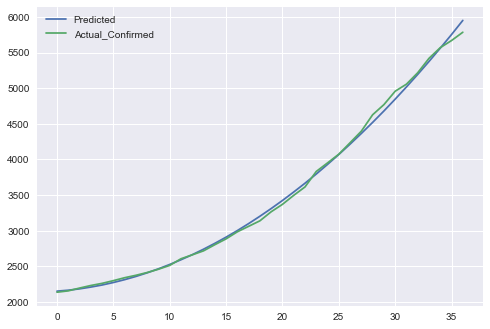

In [299]:
CompareConfirmed.plot()
plt.show()

In [300]:
print('Mean Absolute Error:', metrics.mean_absolute_error(PredXPB['Confirmed'], PredictedConfirmed))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(PredXPB['Confirmed'], PredictedConfirmed)))

Mean Absolute Error: 36.5945945945946
Root Mean Squared Error: 50.45361798293129


In [301]:
CompareCured.tail()

,Predicted,Actual_Cured
32,3532.0,3526.0
33,3646.0,3764.0
34,3765.0,3867.0
35,3888.0,3867.0
36,4015.0,4144.0


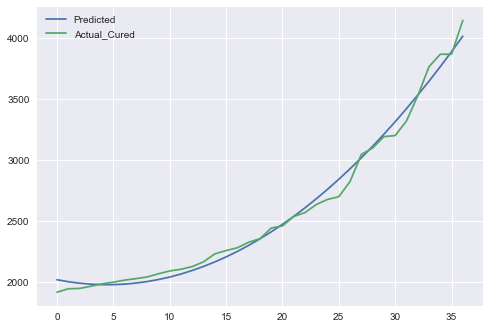

In [302]:
CompareCured.plot()
plt.show()

In [303]:
print('Mean Absolute Error:', metrics.mean_absolute_error(PredXPB['Cured'], PredictedCured))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(PredXPB['Cured'], PredictedCured)))

Mean Absolute Error: 49.945945945945944
Root Mean Squared Error: 62.88771632731519


# When we start seeing flattening and or possible declining of respective curves for confirmed and cured case we will modify our predictor model and use polynomial of degree 3 to accomodate the same. If we observe the Confirmed cases plot we can see inflexion point (where second derivative, i.e rate of change of slope changes sign from positive to negative - early sign of flattening or possible decline)

In [304]:
print('Predicting for future dates:')
print('Date 28.05.2020 is Day 1')
print('Date 03.07.2020 is Day 36')
print('\nPredicttion Eqn of Confirmed Cases is round(2144.92664093 + 6.00486664*X + 2.61680188*X*X)')
print('Predicttion Eqn of Cured Cases is round(2040.07722008 + (-22.30022301)*X + 2.04530297*X*X)')

Predicting for future dates:
Date 28.05.2020 is Day 1
Date 03.07.2020 is Day 36

Predicttion Eqn of Confirmed Cases is round(2144.92664093 + 6.00486664*X + 2.61680188*X*X)
Predicttion Eqn of Cured Cases is round(2040.07722008 + (-22.30022301)*X + 2.04530297*X*X)
